In [8]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def bubble_sort_trace(arr):
    """Retorna uma lista contendo a sequência completa de estados do Bubble Sort."""
    states = [arr.copy()]  # Primeiro estado: vetor original
    arr = arr.copy()
    n = len(arr)
    for i in range(n):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
            states.append(arr.copy())  # Armazena cada estado do vetor
    return states

def insertion_sort_trace(arr):
    """Retorna uma lista contendo a sequência completa de estados do Insertion Sort."""
    states = [arr.copy()]  # Primeiro estado: vetor original
    arr = arr.copy()
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
            states.append(arr.copy())  # Armazena cada estado
        arr[j + 1] = key
        states.append(arr.copy())  # Armazena o estado final da iteração
    return states

def quick_sort_trace(arr):
    """Retorna uma lista contendo a sequência completa de estados do Quick Sort."""
    states = [arr.copy()]  # Primeiro estado: vetor original
    arr = arr.copy()

    def quick_sort_recursive(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            states.append(arr.copy())  # Armazena o estado após a partição
            quick_sort_recursive(arr, low, pi - 1)
            quick_sort_recursive(arr, pi + 1, high)

    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
                states.append(arr.copy())  # Estado após cada troca
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        states.append(arr.copy())  # Estado final da partição
        return i + 1

    quick_sort_recursive(arr, 0, len(arr) - 1)
    return states

# Geração de dados
num_samples = 100  # Número de exemplos
vector_size = 6    # Tamanho dos vetores

data = []
algorithms = {
    "Bubble Sort": bubble_sort_trace,
    "Insertion Sort": insertion_sort_trace,
    "Quick Sort": quick_sort_trace
}

for _ in range(num_samples):
    original_vector = random.sample(range(1, 100), vector_size)  # Vetor aleatório único
    for algo_name, algo_func in algorithms.items():
        states = algo_func(original_vector)  # Obtém a sequência completa de estados
        data.append({"states": states, "algorithm": algo_name})

# Criar DataFrame
df = pd.DataFrame(data)

# Visualizar os primeiros exemplos
print(df.head())

# Ver tamanho das sequências
df["sequence_length"] = df["states"].apply(len)
print(df["sequence_length"].describe())  # Estatísticas sobre os tamanhos das sequências


                                              states       algorithm
0  [[82, 62, 90, 19, 75, 78], [62, 82, 90, 19, 75...     Bubble Sort
1  [[82, 62, 90, 19, 75, 78], [82, 82, 90, 19, 75...  Insertion Sort
2  [[82, 62, 90, 19, 75, 78], [62, 82, 90, 19, 75...      Quick Sort
3  [[73, 51, 3, 89, 91, 58], [51, 73, 3, 89, 91, ...     Bubble Sort
4  [[73, 51, 3, 89, 91, 58], [73, 73, 3, 89, 91, ...  Insertion Sort
count    300.000000
mean      14.336667
std        2.417188
min        8.000000
25%       13.000000
50%       15.000000
75%       16.000000
max       21.000000
Name: sequence_length, dtype: float64


In [9]:
df

,states,algorithm,sequence_length
0,"[[82, 62, 90, 19, 75, 78], [62, 82, 90, 19, 75...",Bubble Sort,16
1,"[[82, 62, 90, 19, 75, 78], [82, 82, 90, 19, 75...",Insertion Sort,14
2,"[[82, 62, 90, 19, 75, 78], [62, 82, 90, 19, 75...",Quick Sort,14
3,"[[73, 51, 3, 89, 91, 58], [51, 73, 3, 89, 91, ...",Bubble Sort,16
4,"[[73, 51, 3, 89, 91, 58], [73, 73, 3, 89, 91, ...",Insertion Sort,12
...,...,...,...
295,"[[87, 68, 88, 98, 13, 53], [87, 87, 88, 98, 13...",Insertion Sort,15
296,"[[87, 68, 88, 98, 13, 53], [13, 68, 88, 98, 87...",Quick Sort,9
297,"[[35, 70, 11, 62, 76, 48], [35, 70, 11, 62, 76...",Bubble Sort,16
298,"[[35, 70, 11, 62, 76, 48], [35, 70, 11, 62, 76...",Insertion Sort,12


In [10]:
# ---------- PRÉ-PROCESSAMENTO ----------
# Extrair os rótulos (nomes dos algoritmos) do DataFrame
labels = df["algorithm"]  # Adicione esta linha

# Transformar os rótulos em números (Label Encoding)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)  # Transforma "Bubble Sort" → 0, "Insertion Sort" → 1, etc.

# Padronizar o comprimento das sequências para o maior encontrado (com padding)
# Extrair as sequências de estados do DataFrame
sequences = df["states"]  # Adicione esta linha para extrair as sequências
max_length = max(len(seq) for seq in sequences)  # Descobre a sequência mais longa
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post', dtype='float32', value=-1)  # Use sequences aqui

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# ... (resto do código) ...

In [11]:

# ---------- CRIAÇÃO DO MODELO ----------
model = Sequential([
    Masking(mask_value=-1, input_shape=(max_length, vector_size)),  # Ignora os valores de padding (-1)
    LSTM(128, return_sequences=True),  # Camada LSTM
    LSTM(64),  # Outra camada LSTM
    Dense(32, activation='relu'),
    Dense(len(algorithms), activation='softmax')  # Saída com softmax para classificação
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ---------- TREINAMENTO ----------
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# ---------- AVALIAÇÃO ----------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia do modelo: {accuracy:.2%}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.3320 - loss: 1.1117 - val_accuracy: 0.5333 - val_loss: 0.9863
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5719 - loss: 0.9696 - val_accuracy: 0.6000 - val_loss: 0.8290
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6029 - loss: 0.8403 - val_accuracy: 0.5833 - val_loss: 0.7709
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6662 - loss: 0.7290 - val_accuracy: 0.6500 - val_loss: 0.7298
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7641 - loss: 0.5657 - val_accuracy: 0.6500 - val_loss: 0.7507
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7865 - loss: 0.5343 - val_accuracy: 0.6667 - val_loss: 0.6090
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8352 - loss: 0.4199 - val_accuracy: 0.6833 - val_loss: 0.6714
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8651 - loss: 0.3267 - val_accuracy: 0.7000 - v

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9808 - loss: 0.0463 - val_accuracy: 0.8667 - val_loss: 0.3896
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9887 - loss: 0.0394 - val_accuracy: 0.8000 - val_loss: 0.5944
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9852 - loss: 0.0520 - val_accuracy: 0.8167 - val_loss: 0.5805
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9693 - loss: 0.0687 - val_accuracy: 0.8667 - val_loss: 0.4150
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9892 - loss: 0.0454 - val_accuracy: 0.8500 - val_loss: 0.4994
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9835 - loss: 0.0416 - val_accuracy: 0.8333 - val_loss: 0.6943
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9958 - loss: 0.0292 - val_accuracy: 0.8833 - val_loss: 0.3984
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9871 - loss: 0.0352 - val_accuracy: 0.8500 - 

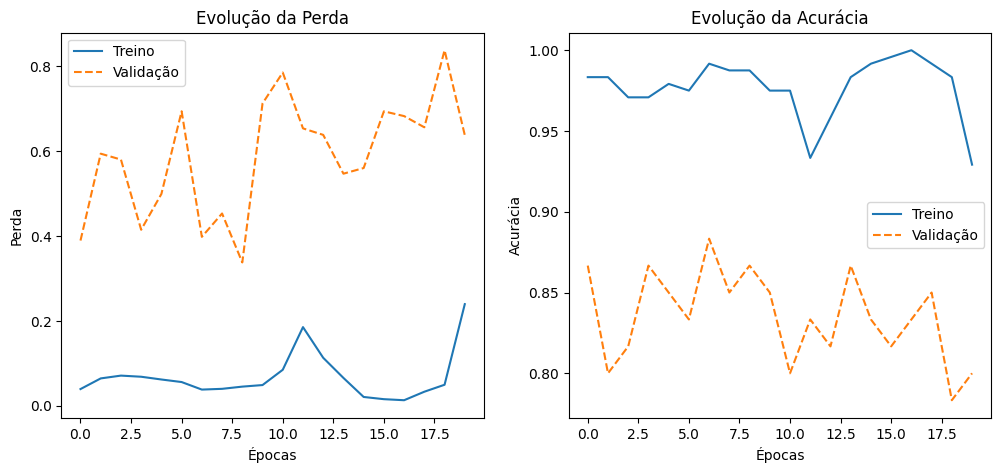

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step


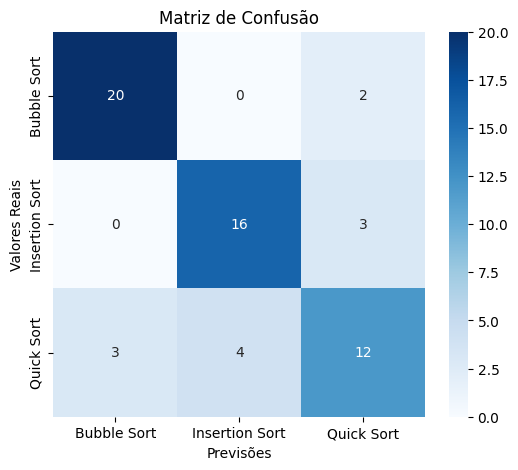

Relatório de Classificação:
                 precision    recall  f1-score   support

   Bubble Sort       0.87      0.91      0.89        22
Insertion Sort       0.80      0.84      0.82        19
    Quick Sort       0.71      0.63      0.67        19

      accuracy                           0.80        60
     macro avg       0.79      0.79      0.79        60
  weighted avg       0.80      0.80      0.80        60



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ---------- GRÁFICO 1: Curvas de perda e acurácia ----------
# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Criar figura para os gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico da perda
ax[0].plot(history.history['loss'], label='Treino')
ax[0].plot(history.history['val_loss'], label='Validação', linestyle='dashed')
ax[0].set_title('Evolução da Perda')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('Perda')
ax[0].legend()

# Gráfico da acurácia
ax[1].plot(history.history['accuracy'], label='Treino')
ax[1].plot(history.history['val_accuracy'], label='Validação', linestyle='dashed')
ax[1].set_title('Evolução da Acurácia')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Acurácia')
ax[1].legend()

plt.show()

# ---------- GRÁFICO 2: Matriz de confusão ----------
# Fazer previsões
y_pred = model.predict(X_test).argmax(axis=1)

# Criar matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

# ---------- RELATÓRIO DE CLASSIFICAÇÃO ----------
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
